# Analisis de datos - Imagenes Clasificadas

## Inicializacion de librerias y DataFrame

- Primero importamos las librerias que vamos a utilizar. 
- Luego creamos variables con direcciones, del programa, del csv y del json: __(path_main,path_tagger,path_profiles)__

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os
COLORS = [
    '#BFEFFF',  # Lightblue
    '#BDF5BD',  # Lightgreen
    '#FFCACA',  # Red
    '#FFD8A0',  # Orange
    '#DAB8D9',  # Purple
    '#FFFFC0',  # Yellow
    '#C2FFFF',  # Cyan
    '#E0E0E0',  # Black
    '#F0E68C',  # Khaki
    '#ADD8E6',  # Lightblue
    '#98FB98',  # Palegreen
    '#FFA07A',  # Lightsalmon
    '#E6E6FA',  # Lavender
    '#FFEC8B',  # Lightgoldenrodyellow
]
path_main = os.path.join(os.path.abspath('')[:-9])
path_tagger = os.path.join(path_main, 'config','data_files','tagger.csv')
path_profiles = os.path.join(path_main,'config','data_files','profiles.json')


- Creamos el dataFrame con toda la inforamcion del csv del tagger

In [58]:
dF = pd.read_csv(path_tagger) 
dF

,Relative path,Description,Resolution,Size,Type,Tags,Profile,Last_update
0,astronauta.jpeg,vertical,"(720, 1280)",78197,image/jpeg,"['astronauta', 'cielo', 'pychodelic']",s0sh1,1583515298
1,Laprovitola.raw,vertical,"(935, 1681)",239046,image/RAW,"['space ', 'jam', 'basket']",Galo,1269514188
2,Cielo Vertical.svg,vertical,"(1600, 2560)",381980,image/svg+xml,['cielo'],s0sh1,1586515202
3,gato cubanito.svg,NaN,"(1024, 768)",76275,image/svg+xml,['gatito'],s0sh1,1586515229
4,gatito sorprendido.bmp,NaN,"(1024, 768)",90745,image/bmp,"['gatito', 'sorprendido', 'juguete']",s0sh1,1586515249
5,gatito sacando la lengua.png,NaN,"(1024, 768)",96949,image/png,"['gatito', 'lengua', 'enojado']",s0sh1,1586515243
6,snorlax.png,pokemons,"(1920, 1080)",2157124,image/png,"['pokemon', 'snorlax', 'bulbasour', 'game']",s0sh1,1583515324
7,bulba.jpg,green,"(1600, 900)",69440,image/jpeg,"['bulbasaur', 'poke', 'game']",s0sh1,1583515329
8,psycho girl.jpeg,NaN,"(1920, 1080)",262331,image/jpeg,"['pychodelic', 'girl']",s0sh1,1583515294
9,Skyrim Mountain.jpg,NaN,"(1920, 1080)",310191,image/jpeg,"['skyrim', 'game']",s0sh1,1583515311


## Grafico de torta - Tipos de imagenes

- Creamos un DataFrame solamente con la columa llamada 'Type'.
- Luego eliminamos la fila index, ya que no nos sirve.
- Agrupamos por tipo, contando la veces que se repite, y utilizamos reset_index para que vuelva a ser un DataFrame.
- Por ultimo, retiramos la palabra 'image/', de cada fila,  ya que no nos sirve

In [59]:
types = dF['Type'].reset_index()
types = types.drop('index',axis=1)
types = types.groupby(['Type']).value_counts().reset_index()
types['Type'] = types['Type'].str.slice(6)
types

,Type,count
0,RAW,1
1,bmp,1
2,jpeg,4
3,png,4
4,svg+xml,2


- Graficamos con la libreria matplotlib:
        Un grafico de torta, agregando sombras, porcentanjes y especificando la etiqueta de cada uno de los tipos.

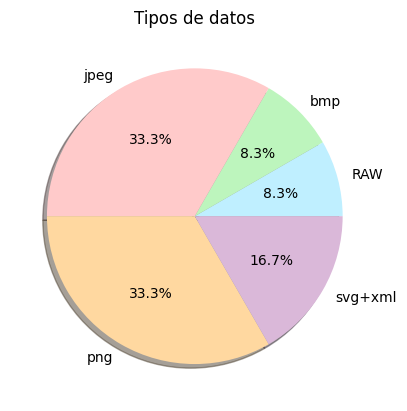

In [60]:
plt.pie(types['count'], labels=types['Type'], autopct='%1.1f%%', shadow=True, colors =COLORS)
plt.title("Tipos de datos")
plt.show()

## Alto y ancho maximos de las imagenes etiquetadas

Agregamos al DataFrame dos columnas:
- Alto: tipo de dato entero.
- Ancho: tipo de dato entero.
  
Esto nos va a servir para poder hacer operaciones con estos numeros

In [61]:
dF['Height'] = dF['Resolution'].apply(lambda x: int(x.split(',')[0][1:]))
dF['Width'] = dF['Resolution'].apply(lambda x: int(x.split(',')[1][:-1]))
dF

,Relative path,Description,Resolution,Size,Type,Tags,Profile,Last_update,Height,Width
0,astronauta.jpeg,vertical,"(720, 1280)",78197,image/jpeg,"['astronauta', 'cielo', 'pychodelic']",s0sh1,1583515298,720,1280
1,Laprovitola.raw,vertical,"(935, 1681)",239046,image/RAW,"['space ', 'jam', 'basket']",Galo,1269514188,935,1681
2,Cielo Vertical.svg,vertical,"(1600, 2560)",381980,image/svg+xml,['cielo'],s0sh1,1586515202,1600,2560
3,gato cubanito.svg,NaN,"(1024, 768)",76275,image/svg+xml,['gatito'],s0sh1,1586515229,1024,768
4,gatito sorprendido.bmp,NaN,"(1024, 768)",90745,image/bmp,"['gatito', 'sorprendido', 'juguete']",s0sh1,1586515249,1024,768
5,gatito sacando la lengua.png,NaN,"(1024, 768)",96949,image/png,"['gatito', 'lengua', 'enojado']",s0sh1,1586515243,1024,768
6,snorlax.png,pokemons,"(1920, 1080)",2157124,image/png,"['pokemon', 'snorlax', 'bulbasour', 'game']",s0sh1,1583515324,1920,1080
7,bulba.jpg,green,"(1600, 900)",69440,image/jpeg,"['bulbasaur', 'poke', 'game']",s0sh1,1583515329,1600,900
8,psycho girl.jpeg,NaN,"(1920, 1080)",262331,image/jpeg,"['pychodelic', 'girl']",s0sh1,1583515294,1920,1080
9,Skyrim Mountain.jpg,NaN,"(1920, 1080)",310191,image/jpeg,"['skyrim', 'game']",s0sh1,1583515311,1920,1080


- Calculamos el maximo y el minimo, tanto de la columna alto, como ancho.

- Lo imprimimos.

In [62]:
max_height = dF['Height'].max()
max_width = dF['Width'].max()
print('+','-'*20,'+')
print(f"| Maximo alto: {max_height}px  |\n|{' '*22}|\n| Maximo ancho: {max_width}px |")
print('+','-'*20,'+')

+ -------------------- +
| Maximo alto: 1920px  |
|                      |
| Maximo ancho: 2560px |
+ -------------------- +


## Grafico dispersion - Relacion alto y ancho de imagenes

- Creamos una variable de tipo series con la informaciond el alto y ancho que tenes almacenada en el DataFrame 

In [63]:
wid_hei = pd.Series(dF['Width'].values, index=dF['Height'])
wid_hei

Height
720     1280
935     1681
1600    2560
1024     768
1024     768
1024     768
1920    1080
1600     900
1920    1080
1920    1080
1920    1200
798      799
dtype: int64

- Graficamos utilizando la libreria matplotlib
  - Cambiamos el color (c), la opacidad(alpha)
  - Agregamos las etiquetas y el titulo
  - Agregamos cuadriculas a la imagen (grid)

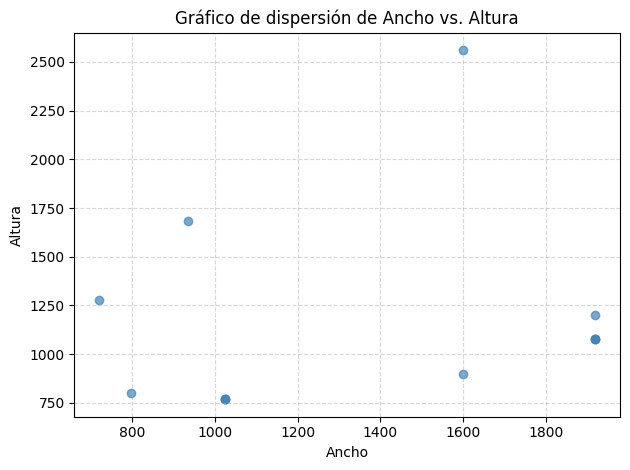

In [64]:
fig, ax = plt.subplots()
ax.scatter(wid_hei.index, wid_hei.values, c='steelblue', alpha=0.7)
ax.set_xlabel('Ancho')
ax.set_ylabel('Altura')
ax.set_title('Gráfico de dispersión de Ancho vs. Altura')
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Grafico de barras - Modificacion segun dia de la semana

Importamos la libreria datetime
Creamos una nueva columna con la fecha bien parseada

In [65]:
from datetime import datetime

dF['Fecha'] = dF['Last_update'].apply(lambda x: datetime.fromtimestamp(x))
dF

,Relative path,Description,Resolution,Size,Type,Tags,Profile,Last_update,Height,Width,Fecha
0,astronauta.jpeg,vertical,"(720, 1280)",78197,image/jpeg,"['astronauta', 'cielo', 'pychodelic']",s0sh1,1583515298,720,1280,2020-03-06 14:21:38
1,Laprovitola.raw,vertical,"(935, 1681)",239046,image/RAW,"['space ', 'jam', 'basket']",Galo,1269514188,935,1681,2010-03-25 07:49:48
2,Cielo Vertical.svg,vertical,"(1600, 2560)",381980,image/svg+xml,['cielo'],s0sh1,1586515202,1600,2560,2020-04-10 07:40:02
3,gato cubanito.svg,NaN,"(1024, 768)",76275,image/svg+xml,['gatito'],s0sh1,1586515229,1024,768,2020-04-10 07:40:29
4,gatito sorprendido.bmp,NaN,"(1024, 768)",90745,image/bmp,"['gatito', 'sorprendido', 'juguete']",s0sh1,1586515249,1024,768,2020-04-10 07:40:49
5,gatito sacando la lengua.png,NaN,"(1024, 768)",96949,image/png,"['gatito', 'lengua', 'enojado']",s0sh1,1586515243,1024,768,2020-04-10 07:40:43
6,snorlax.png,pokemons,"(1920, 1080)",2157124,image/png,"['pokemon', 'snorlax', 'bulbasour', 'game']",s0sh1,1583515324,1920,1080,2020-03-06 14:22:04
7,bulba.jpg,green,"(1600, 900)",69440,image/jpeg,"['bulbasaur', 'poke', 'game']",s0sh1,1583515329,1600,900,2020-03-06 14:22:09
8,psycho girl.jpeg,NaN,"(1920, 1080)",262331,image/jpeg,"['pychodelic', 'girl']",s0sh1,1583515294,1920,1080,2020-03-06 14:21:34
9,Skyrim Mountain.jpg,NaN,"(1920, 1080)",310191,image/jpeg,"['skyrim', 'game']",s0sh1,1583515311,1920,1080,2020-03-06 14:21:51


- Creamos una variable, donde agrupamos por dia de la semana, y guardamos la cantidad de repeticiones.

In [66]:
date = dF.groupby(dF['Fecha'].dt.day_of_week).size()
date

Fecha
3     2
4    10
dtype: int64

- Renombramos los indices de los dias, para luego poder graficarlos con su nombre correspondiente

In [67]:
date = date.rename(index={0:'Lunes',1:'Martes',2:'Miercoles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'})
date

Fecha
Jueves      2
Viernes    10
dtype: int64

- Graficamos utilizando matplotlib, pasando la constante colores para hacerlo mas agradable.
- Tambien le agregamos un texto, y sus respectivas etiquetas.
- Rotamos las etiquetas en el caso que no entren (xticks)
- Ajustamos el espacio entre las barras (tight_layout)

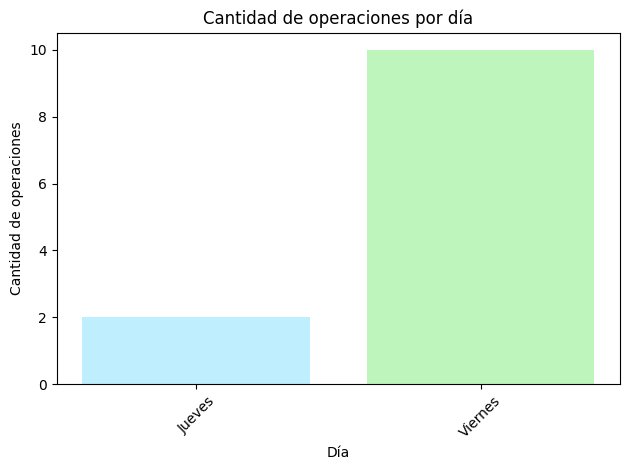

In [68]:
fig, ax = plt.subplots()

ax.bar(date.index, date.values, color=COLORS)

plt.title("Cantidad de operaciones por día")
plt.xlabel("Día")
plt.ylabel("Cantidad de operaciones")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Grafico de lineas - Actualizaciones a travez del tiempo

- Agrupamos segun la fecha, y su cantidad de repeticiones.

In [69]:
date_upt = dF.groupby(dF['Fecha'].dt.date).size()
date_upt

Fecha
2010-03-25    1
2020-03-06    6
2020-04-10    4
2023-10-05    1
dtype: int64

- Graficamos utilizando matplotlib, pasando la el valor 'blue' como color para hacerlo mas agradable.
- Tambien le agremos un texto, y sus respectivas etiquetas.
- Agregamos cuadriculas a la imagen (grid)

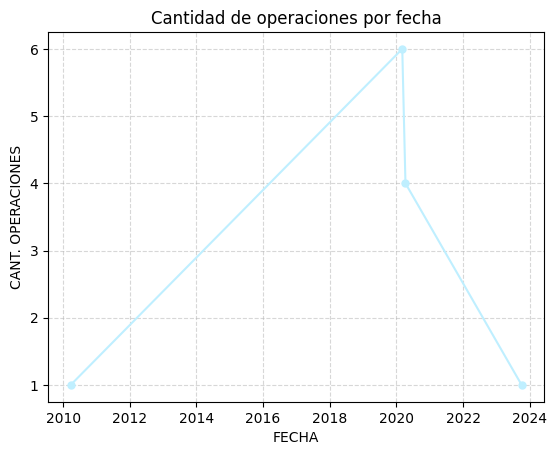

In [70]:
fig, ax = plt.subplots()
ax.plot(date_upt.index, date_upt.values, marker = "o", markersize = 5,color=COLORS[0])
plt.title("Cantidad de operaciones por fecha")
plt.xlabel("FECHA")
plt.ylabel("CANT. OPERACIONES")
ax.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Nube de palabras - Tags

- Guardamos todos los tags, en una variable, spliteando por ', ', para separarlos por palabras.
- Luego creamos una lista estos valores, utilizando el metodo explode().
- Por ultimo reemplazamos las ', por la nada misma, para borrarlas

In [71]:
s_cloud = dF['Tags'].str[1:-1].str.split(', ')
s_cloud = s_cloud.explode()
s_cloud = s_cloud.str.replace("'","")
s_cloud.head()

0    astronauta
0         cielo
0    pychodelic
1        space 
1           jam
Name: Tags, dtype: object

- Luego, agrupamos las palabras, contando sus repeticiones.

In [72]:
s_cloud = s_cloud.groupby(s_cloud.values).count()
s_cloud

astronauta     1
basket         1
bulbasaur      1
bulbasour      1
cielo          2
enojado        1
error          1
game           4
gatito         3
girl           1
jam            1
juguete        1
lengua         1
poke           1
pokemon        1
pychodelic     2
simpsons       1
skyrim         2
snorlax        1
sorprendido    1
space          1
Name: Tags, dtype: int64

- Por ultimo, utilizamos la libreria wordcloud para graficar, usando los parametros del color de fondo, el color del contorno, y un mapeo de color a la nube.

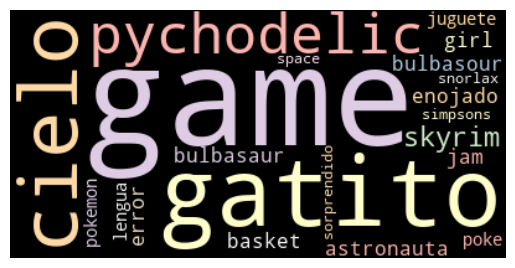

In [73]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black", contour_color='steelblue', colormap='Pastel1')
wordcloud.generate_from_frequencies(s_cloud)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## DataFrame - Tres tags mas utilizados


- Ordenamos los tags que tenemos del grafico anterior, nos quedamos con los 3 mas utilizados
- Lo pasamos a un data frame, reseteamos los indices
- Renombramos las columnas

In [74]:
tags_max = s_cloud.sort_values(ascending=False).head(3)
tags_max = tags_max.to_frame().reset_index()
tags_max = tags_max.rename(columns = {'index':'Tags','Tags':'Usos'})
tags_max

,Tags,Usos
0,game,4
1,gatito,3
2,cielo,2


## DataFrame - Bytes promedio por usuario 

- Creamos DataFrame con datos de los perfiles
- Solo nos quedamos con las llaves, osea los nicks de los perfiles
- Lo volvemos un dataframe, reiniciamos los indices y eliminamos la columna llamada 0, que genera el reset_index
- renombramos la columna index por Profile

In [75]:
dF_json = pd.read_json(path_profiles) 
dF_json = dF_json.keys()
dF_json = dF_json.to_frame().reset_index().drop(0,axis=1) 
dF_json = dF_json.rename(columns={"index": "Profile"})
dF_json

,Profile
0,Galo
1,Lauta
2,albertone
3,s0sh1
4,Nico
5,Profe


- Una vez que tenemos el mismo nombre de la columna donde almacenamos los nicks, podemos hacer un merge, con el dataFrame de los tags

In [76]:
prom= pd.merge(dF,dF_json, on='Profile', how='outer')
prom

,Relative path,Description,Resolution,Size,Type,Tags,Profile,Last_update,Height,Width,Fecha
0,astronauta.jpeg,vertical,"(720, 1280)",78197.0,image/jpeg,"['astronauta', 'cielo', 'pychodelic']",s0sh1,1.583515e+09,720.0,1280.0,2020-03-06 14:21:38
1,Cielo Vertical.svg,vertical,"(1600, 2560)",381980.0,image/svg+xml,['cielo'],s0sh1,1.586515e+09,1600.0,2560.0,2020-04-10 07:40:02
2,gato cubanito.svg,NaN,"(1024, 768)",76275.0,image/svg+xml,['gatito'],s0sh1,1.586515e+09,1024.0,768.0,2020-04-10 07:40:29
3,gatito sorprendido.bmp,NaN,"(1024, 768)",90745.0,image/bmp,"['gatito', 'sorprendido', 'juguete']",s0sh1,1.586515e+09,1024.0,768.0,2020-04-10 07:40:49
4,gatito sacando la lengua.png,NaN,"(1024, 768)",96949.0,image/png,"['gatito', 'lengua', 'enojado']",s0sh1,1.586515e+09,1024.0,768.0,2020-04-10 07:40:43
5,snorlax.png,pokemons,"(1920, 1080)",2157124.0,image/png,"['pokemon', 'snorlax', 'bulbasour', 'game']",s0sh1,1.583515e+09,1920.0,1080.0,2020-03-06 14:22:04
6,bulba.jpg,green,"(1600, 900)",69440.0,image/jpeg,"['bulbasaur', 'poke', 'game']",s0sh1,1.583515e+09,1600.0,900.0,2020-03-06 14:22:09
7,psycho girl.jpeg,NaN,"(1920, 1080)",262331.0,image/jpeg,"['pychodelic', 'girl']",s0sh1,1.583515e+09,1920.0,1080.0,2020-03-06 14:21:34
8,Skyrim Mountain.jpg,NaN,"(1920, 1080)",310191.0,image/jpeg,"['skyrim', 'game']",s0sh1,1.583515e+09,1920.0,1080.0,2020-03-06 14:21:51
9,skyrim mamuts.png,NaN,"(1920, 1200)",298761.0,image/png,"['skyrim', 'game']",s0sh1,1.583515e+09,1920.0,1200.0,2020-03-06 14:21:56


- Creamos otro dataFrame con solamente los nicks y el espacio utilizado
- Agrupamos por perfiles, y contamos las aparicionbes del perfil, sin eliminar las filas que tengan NaN, y resetiamos los indices
- Por ultimo, volvemos a agrupar por perfil, sumamos las columnas, y reseteamos los indices.

In [77]:
dF_profiles = prom[['Profile','Size']]
dF_profiles = dF_profiles.groupby(dF_profiles['Profile']).value_counts(dropna=False).reset_index()
dF_profiles = dF_profiles.groupby(dF_profiles['Profile']).sum().reset_index()
dF_profiles


,Profile,Size,count
0,Galo,629435.0,2
1,Lauta,0.0,1
2,Nico,0.0,1
3,Profe,0.0,1
4,albertone,0.0,1
5,s0sh1,3821993.0,10


- Creamos una columna Averange donde se guarda el promedio del espacio utilizado en bytes
- Creamos una columna Averange_MB donde pasamos el valor de la columna Average a MB
- Luego ese valor lo pasamos a string, y le sumamos la palbara 'MB'

In [78]:
dF_profiles['Average'] = (dF_profiles['Size'] / dF_profiles['count'])
dF_profiles['Average_MB'] = round(dF_profiles['Average'] / (1024*1024), 2)
dF_profiles['Average_MB'] = dF_profiles['Average_MB'].astype(str)
dF_profiles['Average_MB'] = dF_profiles['Average_MB'] + ' MB'

- Por ultimo creamos un dataFrame, con las columnas Profile y Averange_MB
- Renombramos las columnas, y mostramos

In [79]:
dF_final = dF_profiles[['Profile','Average_MB']]
dF_final = dF_final.rename(columns={'Profile':'Perfil','Average_MB':'Tamaño promedio'})
dF_final

,Perfil,Tamaño promedio
0,Galo,0.3 MB
1,Lauta,0.0 MB
2,Nico,0.0 MB
3,Profe,0.0 MB
4,albertone,0.0 MB
5,s0sh1,0.36 MB


# Analisis de datos de log del sistema

## Inicializacion de librerias y DataFrames

- Inicializamos las librerias
- La constate colors, con los colores que usaremos
- Las variables con las direcciones de los archivos que utilizaremos

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import os
COLORS = [
    '#BFEFFF',  # Lightblue
    '#BDF5BD',  # Lightgreen
    '#FFCACA',  # Red
    '#FFD8A0',  # Orange
    '#DAB8D9',  # Purple
    '#FFFFC0',  # Yellow
    '#C2FFFF',  # Cyan
    '#E0E0E0',  # Black
    '#F0E68C',  # Khaki
    '#ADD8E6',  # Lightblue
    '#98FB98',  # Palegreen
    '#FFA07A',  # Lightsalmon
    '#E6E6FA',  # Lavender
    '#FFEC8B',  # Lightgoldenrodyellow
]
path_main = os.path.join(os.path.abspath('')[:-9])
path_tagger = os.path.join(path_main, 'config','data_files','tagger.csv')
path_profiles = os.path.join(path_main,'config','data_files','profiles.json')
path_logs = os.path.join(path_main,'logs','logs.csv')


- Creamos el dataFrame con los datos del logs.csv

In [81]:
dF_logs = pd.read_csv(path_logs)
dF_logs.head()

,timestamp,nick,event,value,text
0,1269514112,Galo,profile_created,NaN,NaN
1,1269514138,Galo,change_config_collage_path,NaN,NaN
2,1269514145,Galo,new_image_classified,astronauta.jpeg,NaN
3,1269514154,Galo,change_tags,astronauta.jpeg,"['astronauta', 'cielo']"
4,1269514159,Galo,change_description,astronauta.jpeg,vertical


## Grafico de barras - Uso por dia de semana

- Importamos la libreria datetime
- Creamos una nueva columna con la fecha bien pareseada
- Guardamos en variable date, la agrupacion de las fechas segun el dia de la semana, y la cantidad de veces que se repite

In [82]:
from datetime import datetime
dF_logs['date'] = dF_logs['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
date = dF_logs.groupby(dF_logs['date'].dt.day_of_week).size()

- Renombramos los indices con los respectivos nombres de los dias de la semana

In [83]:
date = date.rename(index={0:'Lunes',1:'Martes',2:'Miercoles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'})
date

date
Martes        3
Miercoles     2
Jueves       12
Viernes      31
Domingo      11
dtype: int64

- Graficamos utilizando matplotlib
- Le agregamos un titulo, y sus etiquetas
- Ajustamos el texto de las etiquetas para que queden rotadas, en caso que sea necesario
- Se muestra el grafico

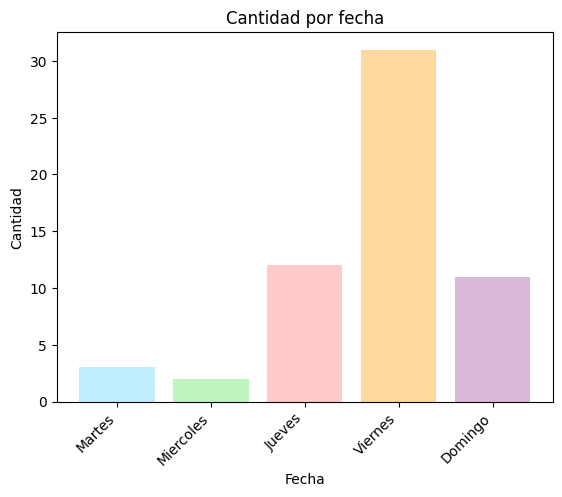

In [84]:
fig, ax = plt.subplots()
ax.bar(date.index, date.values,color=COLORS)

plt.title("Cantidad por fecha")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")

plt.xticks(rotation=45, ha='right')

plt.show()

## Grafico de Torta - Procentaje de uso de la aplicacion por generos

- Creamos un dataFrame con los datos del JSON de los perfiles
- Rotamos los indices por las columnas
- Renombramos la columna index por nick

In [85]:
dF_profile = pd.read_json(path_profiles)
dF_profile = dF_profile.transpose().reset_index()
dF_profile = dF_profile.rename(columns={'index':'nick'})
dF_profile

,nick,name,age,genre,image
0,Galo,galoA,23,Hombre,avatar_8.088867.png
1,Lauta,lauta,26,Otre,avatar_5.601328.png
2,albertone,albert,40,Mujer,avatar_0.776826.png
3,s0sh1,Fran,23,Hombre,avatar_3.858806.png
4,Nico,nico,123,Mujer,avatar_2.647236.png
5,Profe,Agus,22,Hombre,avatar_2.098943.png


- Creamos otro data frame, quedandonos solo con la columna nick, del dataframe de los logs

In [86]:
dF_nick_log = dF_logs['nick'].to_frame()
dF_nick_log.head()

,nick
0,Galo
1,Galo
2,Galo
3,Galo
4,Galo


- Como tenen el mismo nombre, podemos juntar los dos dataFrames con un merge, y quedarnos con la columna de genero

In [87]:
dF_merge = pd.merge(dF_nick_log,dF_profile,on='nick',how='outer')['genre']
dF_merge.head()


0    Hombre
1    Hombre
2    Hombre
3    Hombre
4    Hombre
Name: genre, dtype: object

- Ahora ya podemos agrupar por genero, y contar sus repeticiones
- Renombramos la columna genre, por cant, y reseteamos los indices

In [88]:
dF_genre = dF_merge.groupby(dF_merge).size().to_frame()
dF_genre = dF_genre.rename(columns={'genre':'cant'}).reset_index()
dF_genre

,genre,cant
0,Hombre,45
1,Mujer,6
2,Otre,8


- Creamos el grafico, pasandole los datos de del dataFrame, los colores de la constante COLORS, le agregamos sombras, formateamos los valores a procentajes, y que comienze con un angulo de 90 grados
- Nos aseguramos que el grafico quede con un aspecto redondo
- Agregamos un titulo

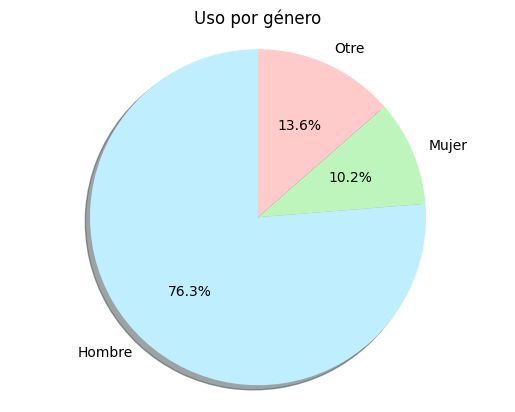

In [89]:
plt.pie(dF_genre['cant'], labels=dF_genre['genre'], autopct='%1.1f%%', colors=COLORS, shadow=True, startangle=90)
plt.axis('equal')
plt.title("Uso por género")
plt.show()

## Grafico de barras - Cantidades de operaciones realizadas

- Vamos a utilizar el dataFrame de Logs

In [90]:
dF_logs.head()

,timestamp,nick,event,value,text,date
0,1269514112,Galo,profile_created,NaN,NaN,2010-03-25 07:48:32
1,1269514138,Galo,change_config_collage_path,NaN,NaN,2010-03-25 07:48:58
2,1269514145,Galo,new_image_classified,astronauta.jpeg,NaN,2010-03-25 07:49:05
3,1269514154,Galo,change_tags,astronauta.jpeg,"['astronauta', 'cielo']",2010-03-25 07:49:14
4,1269514159,Galo,change_description,astronauta.jpeg,vertical,2010-03-25 07:49:19


- Guardamos en cant_op la cantidad de eventos de los logs, agrupando por evento y contando las repeticiones.

In [91]:
cant_op = dF_logs['event'].groupby(dF_logs['event']).size()
cant_op

event
change_config_collage_path     2
change_config_image_path       3
change_description             5
change_tags                   19
new_collage                    5
new_image_classified          12
new_meme                       3
profile_created                6
profile_modified               4
Name: event, dtype: int64

- Creamos el grafico de barras, utilizando los colores de la constante COLORS
- Cambiamos el fondo del grafico
- Le agregamos titulo y etiquetas
- Ajustamos el formato de las etiquetas a 45 grados
- Imprimimos

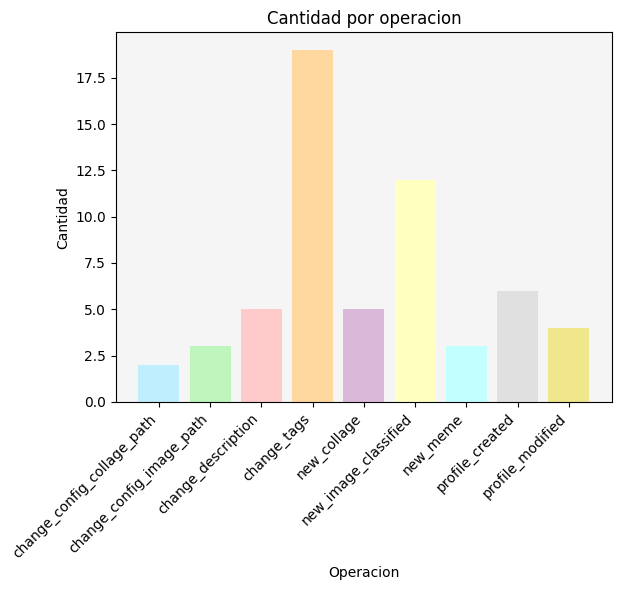

In [92]:
fig, ax = plt.subplots()
ax.bar(cant_op.index, cant_op.values,color=COLORS)
ax.set_facecolor('whitesmoke')

plt.title("Cantidad por operacion")
plt.xlabel("Operacion")
plt.ylabel("Cantidad")

plt.xticks(rotation=45, ha='right')
plt.show()

## Grafico de barra apilado horizontal - Operaciones por nick

- Vamos a utlizar el dataFrame de logs

In [93]:
dF_logs.head()

,timestamp,nick,event,value,text,date
0,1269514112,Galo,profile_created,NaN,NaN,2010-03-25 07:48:32
1,1269514138,Galo,change_config_collage_path,NaN,NaN,2010-03-25 07:48:58
2,1269514145,Galo,new_image_classified,astronauta.jpeg,NaN,2010-03-25 07:49:05
3,1269514154,Galo,change_tags,astronauta.jpeg,"['astronauta', 'cielo']",2010-03-25 07:49:14
4,1269514159,Galo,change_description,astronauta.jpeg,vertical,2010-03-25 07:49:19


- Nos quedamos con las columnas nick y event del dataframe
- Agrupamos por nick y event, contamos repeticiones, lo volvemos dataframe y reseteamos los indices
- Renombramos las columnas

In [94]:
cant_op_nick = dF_logs[['nick','event']]
cant_op_nick = cant_op_nick.groupby(['nick','event']).size().to_frame().reset_index()
cant_op_nick = cant_op_nick.rename(columns={0:'cant','nick':'Nick','event':'Operacion'})
cant_op_nick.head()

,Nick,Operacion,cant
0,Galo,change_config_collage_path,1
1,Galo,change_config_image_path,1
2,Galo,change_description,2
3,Galo,change_tags,3
4,Galo,new_collage,2


- Utilizamos el metodo pivot, para rotar el dataframe, poniendo como indice la columna Nick, y como columna el indice Operacion, los valores de DF seran los que estan en la columna cant. Luego reemplazamos los NaN por 0

In [95]:
df_pivot = cant_op_nick.pivot(index='Nick',columns='Operacion', values='cant').fillna(0)
df_pivot.head()

Operacion,change_config_collage_path,change_config_image_path,change_description,change_tags,new_collage,new_image_classified,new_meme,profile_created,profile_modified
Nick,,,,,,,,,
Galo,1.0,1.0,2.0,3.0,2.0,3.0,0.0,1.0,0.0
Lauta,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,2.0
Nico,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Profe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
albertone,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


- Graficamos, poniendo titulo, especificando que hay que stackear los valores, y usando los colores de la constante COLORS.

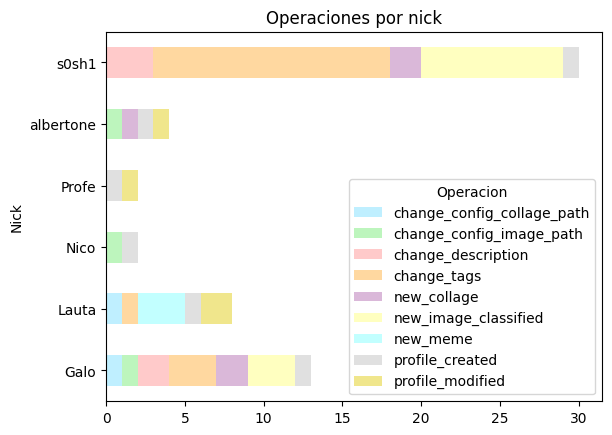

In [96]:
df_pivot.plot.barh(stacked=True, title='Operaciones por nick', color=COLORS)
plt.show()

## DataFrame - Ranking de meme y collage

- Nos quedamos con las columnas de event y value del DataFrame de logs
- Guardamos en new_meme, solo las filas que tengan en evento new_meme
- Agrupamos los eventos y contamos las repeticiones
- Ordenamos de manera descendente, y lo transformamos en DataFrame
- Renombramos la columna value, reseteamos los indices y remobramos la otra columna value
- Nos quedamos con los 5 primeros

In [97]:
logs_events = dF_logs[['event','value']]
new_meme = logs_events.loc[logs_events['event'] == 'new_meme', 'value']
new_meme = new_meme.groupby(new_meme).count()
new_meme = new_meme.sort_values(ascending=False).to_frame()
new_meme = new_meme.rename(columns={'value': 'Usos'}).reset_index().rename(columns={'value': 'Imagen'})
new_meme = new_meme.head(5)
new_meme


,Imagen,Usos
0,bob_sponge.png,2
1,car.png,1


- Creamos un DataFrame con las columans de event y value de dF_logs
- Solo guardamos los eventos que sean new_collage, lo transformamos a data frame
- Spliteamos los valores por comnas, le sacamos las corchetes de inicio y final
- Transformamos esa lista str, a una fila individual por elemento

In [98]:
logs_events = dF_logs[['event','value']]
new_collage = logs_events.loc[logs_events['event'] == 'new_collage', 'value'].to_frame()
new_collage = new_collage['value'].str[1:-1].str.split(', ')
new_collage = new_collage.explode()
new_collage

8                  'astronauta.jpeg'
8                  'Laprovitola.raw'
46               'gato cubanito.svg'
46          'gatito sorprendido.bmp'
46    'gatito sacando la lengua.png'
47                     'snorlax.png'
47                       'bulba.jpg'
48             'Skyrim Mountain.jpg'
48               'skyrim mamuts.png'
57                       'error.png'
57                       'error.png'
Name: value, dtype: object

- Agrupamos por los mismo valores, y contamos sus repeticiones
- Ordenamos de manera descendete, y lo convertimos en DataFrame
- Renombramos las columas value
- Nos quedamos con los primeros 5

In [99]:
new_collage = new_collage.groupby(new_collage).count()
new_collage = new_collage.sort_values(ascending=False).to_frame()
new_collage = new_collage.rename(columns={'value': 'Usos'}).reset_index().rename(columns={'value': 'Imagen'})
new_collage = new_collage.head(5)
new_collage

,Imagen,Usos
0,'error.png',2
1,'Laprovitola.raw',1
2,'Skyrim Mountain.jpg',1
3,'astronauta.jpeg',1
4,'bulba.jpg',1


## Nubes de palabras - Textos de memes y collages

- Utilizaremos las columnas de event y text del dataFrame dF_logs

In [100]:
dF_logs[['event','text']].head()

,event,text
0,profile_created,NaN
1,change_config_collage_path,NaN
2,new_image_classified,NaN
3,change_tags,"['astronauta', 'cielo']"
4,change_description,vertical


### Texto de memes

- Nos quedamos solo con los eventos que sean 'new_meme', y lo convertimos en dataframe

In [101]:
meme_text = dF_logs[['event','text']].loc[logs_events['event'] == 'new_meme', 'text'].to_frame()
meme_text

,text
13,['recuerda realizar comentarios respetuosos']
14,['meme prueba 1']
15,"['seguir con la carrera', 'terminar trabajando..."


- Hacemos un slicing, eliminando los corchetes, y eliminamos las comillas simples y comas, y lo dividimos en una lista de acuerdo a los espacios
- Luego, transformamos esos elementos de la lista, a filas del dataframe, y los guardamos en la columna text

In [102]:
meme_text['text'] = meme_text['text'].str[1:-1].str.replace("'","").str.replace(",","").str.split(' ')
meme_text = meme_text.explode(column='text')
meme_text

,text
13,recuerda
13,realizar
13,comentarios
13,respetuosos
14,meme
14,prueba
14,1
15,seguir
15,con
15,la


- Agrupamos estas palabras, y contamos la cantidad de repeticiones 

In [103]:
meme_text = meme_text.groupby(['text']).size()

- Por ultimo, utilizamos la libreria wordcloud para graficar, usando los parametros del color de fondo, el color del contorno, y un mapeo de color a la nube.

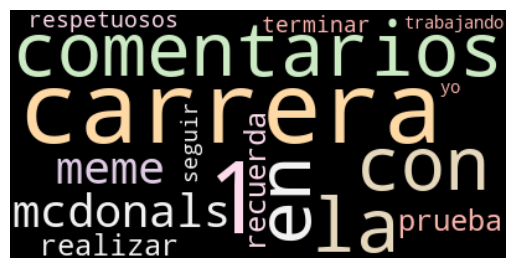

In [104]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black", contour_color='steelblue', colormap='Pastel1')
wordcloud.generate_from_frequencies(meme_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Texto de Collages

- Nos quedamos solo con los eventos que sean 'new_collage', y lo convertimos en dataframe

In [105]:
collage_text = dF_logs[['event','text']].loc[logs_events['event'] == 'new_collage', 'text'].to_frame()
collage_text

,text
8,to the space
46,cats
47,pokemon
48,elder scrol
57,error.png


- Dividimos las palabras en una lista de acuerdo a los espacios
- Luego, transformamos esos elementos de la lista, a filas del dataframe, y los guardamos en la columna text

In [106]:
collage_text['text'] = collage_text['text'].str.split(' ')
collage_text = collage_text.explode(column='text')
collage_text

,text
8,to
8,the
8,space
46,cats
47,pokemon
48,elder
48,scrol
57,error.png


- Agrupamos estas palabras, y contamos la cantidad de repeticiones 

In [107]:
collage_text = collage_text.groupby(['text']).size()

- Por ultimo, utilizamos la libreria wordcloud para graficar, usando los parametros del color de fondo, el color del contorno, y un mapeo de color a la nube.

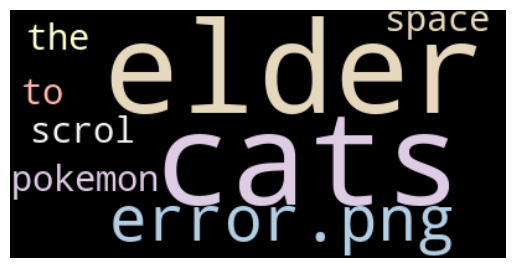

In [108]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black", contour_color='steelblue', colormap='Pastel1')
wordcloud.generate_from_frequencies(collage_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Grafico de torta - Operaciones por genero

- Nos quedamos con las columans de nick y event
- Renombramos la columna nick por Nick

In [109]:
cant_op_nick = dF_logs[['nick','event']]
cant_op_nick = cant_op_nick.rename(columns={'Nick':'nick'})
cant_op_nick.head()

,nick,event
0,Galo,profile_created
1,Galo,change_config_collage_path
2,Galo,new_image_classified
3,Galo,change_tags
4,Galo,change_description


- Vamos a utilizar el dataframe de los perfiles

In [110]:
dF_profile.head()

,nick,name,age,genre,image
0,Galo,galoA,23,Hombre,avatar_8.088867.png
1,Lauta,lauta,26,Otre,avatar_5.601328.png
2,albertone,albert,40,Mujer,avatar_0.776826.png
3,s0sh1,Fran,23,Hombre,avatar_3.858806.png
4,Nico,nico,123,Mujer,avatar_2.647236.png


- Realizamos un merge de acuerdo a la columna nick, agregando la columna gerne al dataframe cant_op_nick y realizamos slicing por columnas genre y event
- Dejamos solamente en la columna event, los eventos que sean change_tags, ne_image_classified, y change_description
- Quitamos las filas que contengan NaN
- Agrupamos segun genero y luego evento, contamos las repeticiones, lo transformamos a dataframe y reseteamos los indices
- Concadenamos los valores de las columnas a una sola columna
- Eliminamos la columna event
- Renombramos la columna genre y la columna 0

In [111]:
op_gen = pd.merge(cant_op_nick,dF_profile,on='nick',how='left')[['genre','event']]
op_gen['event'] = op_gen.loc[(op_gen['event'] == 'change_tags') | (op_gen['event'] == 'new_image_classified') | (op_gen['event'] == 'change_description'), 'event']
op_gen = op_gen.dropna()
op_gen = op_gen.groupby(['genre','event']).size().to_frame().reset_index()
op_gen['genre'] = op_gen['genre'] + " " + op_gen['event'] 
op_gen = op_gen.drop('event',axis=1)
op_gen = op_gen.rename(columns={'genre':'genre+op',0:'cant'})
op_gen

,genre+op,cant
0,Hombre change_description,5
1,Hombre change_tags,18
2,Hombre new_image_classified,12
3,Otre change_tags,1


- Creamos el grafico de torta, le agregamos las etiquetas, transformamos los valores a porcentaje, usamos los colores de la constante COLORS, habilitamos las sombras, y que comienze el grafico en un angilo de 90 grados
- Hacemos que sea si o si, un circulo
- Le agregamos un titulo

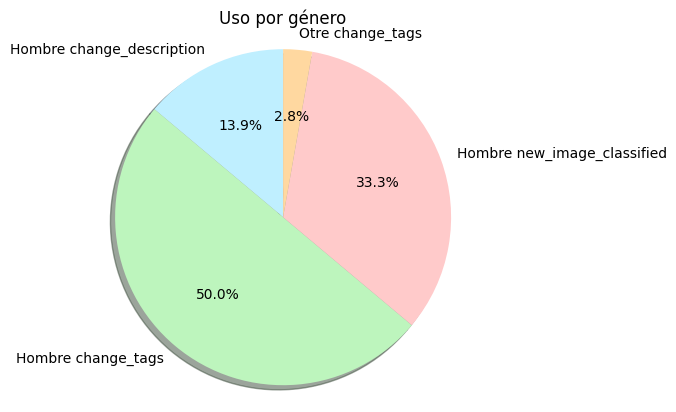

In [112]:
plt.pie(op_gen['cant'], labels=op_gen['genre+op'], autopct='%1.1f%%', colors=COLORS, shadow=True, startangle=90)

plt.axis('equal')
plt.title("Uso por género")

plt.show()